In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Recall 1

## load the data

In [2]:
## Load the data
data = pd.read_csv('stats_df_sex_cond_0716.csv')
data.head()

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,0.232744,1.777517,-3.063490,3.102825,-3.404097,28.309280,-185.965050,10.971327,63.939822,50.259249,3.593064,247.028322,0.150,0.488889
1,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,-0.246350,0.178788,-0.327780,0.157195,2.046138,1.447916,0.512935,4.477111,83.506169,20.152680,53.328766,112.365485,0.025,0.466667
2,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,-2.981436,0.045551,-3.070323,-2.906338,1.836780,18.796499,-1.255300,186.954564,20.015562,12.571853,1.510919,64.336373,0.050,3.300000
3,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,-0.074325,0.108754,-0.246370,0.060003,-0.025601,0.218436,-0.392321,0.553747,19.978555,13.389197,4.364641,66.100139,0.075,0.888889
4,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,0.982853,1.533064,-0.062210,3.068792,-10.436042,26.455294,-80.826015,-0.241989,98.586184,44.241426,41.888859,190.414703,0.025,0.600000


In [3]:
## load the freezing time dataset
freezing_data = pd.read_csv('PTSD_final.csv', index_col=0)
freezing_data = freezing_data.drop(columns=['dob','date_sefla'])
#convert the control and sex to 0 and 1
freezing_data['condition'] = freezing_data['condition'].map({'sefl': 1, 'control':0})
freezing_data['sex'] = freezing_data['sex'].map({'male': 1, 'female':0})
freezing_data.drop(columns=(['date_recall5', 'freezing_recall5']), inplace=True)
freezing_data.dropna(inplace=True)
freezing_data['freezing_recall4'] = pd.cut(freezing_data['freezing_recall4'], bins=[0,20,65], labels=[0,1])
freezing_data

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,condition,sex,age_selfa
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,0,21.0,0,1,71
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,0,21.0,0,1,71
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,0,21.0,0,1,71
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,0,21.0,1,1,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,1,30.0,1,1,91
70,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,1,30.0,1,1,91
71,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,0,30.0,1,1,91
72,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,1,30.0,1,1,91


## data validation (重做， control 和 sefl group)

In [4]:
## group the frequency by syllable, name it as 'frequency_syllable'
frequency_syllable = data.groupby(['syllable']).size().reset_index(name='frequency_syllable')
frequency_syllable.frequency_syllable.sort_values(ascending=False)

0     74
3     71
5     69
2     64
4     64
1     62
10    57
7     56
9     56
13    54
6     52
11    48
14    47
8     40
15    37
12    35
16    24
17    22
18    19
19    11
Name: frequency_syllable, dtype: int64

In [5]:
## group the duration by syllable, name it as 'duration_syllable'
duration_syllable = data.groupby(['syllable'])['duration'].mean().reset_index(name='duration_syllable')
duration_syllable.duration_syllable.sort_values(ascending=False)

17    4.584848
14    2.611567
2     2.524120
10    2.516511
13    2.406152
5     2.161244
18    1.966374
0     1.352740
15    1.281682
4     1.277298
1     1.262747
8     1.228477
7     1.117044
3     0.989175
16    0.834259
19    0.774343
9     0.596274
6     0.583490
11    0.401798
12    0.342729
Name: duration_syllable, dtype: float64

### add cohort_id

In [6]:
## add a column called condtion, if group has control, then condition is 0, else is 1
data['condition'] = data['group'].apply(lambda x: 0 if 'control' in x else 1)
data

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,condition
0,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,0.232744,1.777517,-3.063490,3.102825,-3.404097,28.309280,-185.965050,10.971327,63.939822,50.259249,3.593064,247.028322,0.150000,0.488889,0
1,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,-0.246350,0.178788,-0.327780,0.157195,2.046138,1.447916,0.512935,4.477111,83.506169,20.152680,53.328766,112.365485,0.025000,0.466667,0
2,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,-2.981436,0.045551,-3.070323,-2.906338,1.836780,18.796499,-1.255300,186.954564,20.015562,12.571853,1.510919,64.336373,0.050000,3.300000,0
3,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,-0.074325,0.108754,-0.246370,0.060003,-0.025601,0.218436,-0.392321,0.553747,19.978555,13.389197,4.364641,66.100139,0.075000,0.888889,0
4,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,0.982853,1.533064,-0.062210,3.068792,-10.436042,26.455294,-80.826015,-0.241989,98.586184,44.241426,41.888859,190.414703,0.025000,0.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,5,-2.341098,0.242290,-2.698530,-2.054975,-0.130242,1.075151,-1.619679,4.420868,37.587878,28.158912,4.588638,113.971740,0.054054,1.300000,1
958,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,6,-2.449230,0.205585,-2.689262,-2.200492,-2.902469,0.699792,-3.751537,-2.118775,81.710958,40.625705,24.803353,116.303155,0.027027,0.266667,1
959,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,9,-1.486558,2.003868,-2.885793,2.759876,6.046484,58.452391,-183.870997,184.403570,89.587031,47.262957,12.915086,226.877736,0.243243,0.437037,1
960,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,10,-2.134411,0.982780,-2.700669,2.160463,-0.174658,0.937117,-5.881146,5.030469,25.677577,21.826436,1.086143,146.420004,0.081081,6.111111,1


In [7]:
data['cohort_id'] = 'ptsd'+data['name'].str.split('DLC').str[0]
data['cohort_id'] = data['cohort_id'].str.replace('_0', '_')
data['cohort_id'] = data['cohort_id'].str.replace('.1', '')
data

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,condition,cohort_id
0,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,0.232744,1.777517,-3.063490,3.102825,-3.404097,28.309280,-185.965050,10.971327,63.939822,50.259249,3.593064,247.028322,0.150000,0.488889,0,ptsd5_2
1,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,-0.246350,0.178788,-0.327780,0.157195,2.046138,1.447916,0.512935,4.477111,83.506169,20.152680,53.328766,112.365485,0.025000,0.466667,0,ptsd5_2
2,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,-2.981436,0.045551,-3.070323,-2.906338,1.836780,18.796499,-1.255300,186.954564,20.015562,12.571853,1.510919,64.336373,0.050000,3.300000,0,ptsd5_2
3,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,-0.074325,0.108754,-0.246370,0.060003,-0.025601,0.218436,-0.392321,0.553747,19.978555,13.389197,4.364641,66.100139,0.075000,0.888889,0,ptsd5_2
4,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,0.982853,1.533064,-0.062210,3.068792,-10.436042,26.455294,-80.826015,-0.241989,98.586184,44.241426,41.888859,190.414703,0.025000,0.600000,0,ptsd5_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,5,-2.341098,0.242290,-2.698530,-2.054975,-0.130242,1.075151,-1.619679,4.420868,37.587878,28.158912,4.588638,113.971740,0.054054,1.300000,1,ptsd9_31-2
958,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,6,-2.449230,0.205585,-2.689262,-2.200492,-2.902469,0.699792,-3.751537,-2.118775,81.710958,40.625705,24.803353,116.303155,0.027027,0.266667,1,ptsd9_31-2
959,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,9,-1.486558,2.003868,-2.885793,2.759876,6.046484,58.452391,-183.870997,184.403570,89.587031,47.262957,12.915086,226.877736,0.243243,0.437037,1,ptsd9_31-2
960,male and sefl,9_31-2DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,10,-2.134411,0.982780,-2.700669,2.160463,-0.174658,0.937117,-5.881146,5.030469,25.677577,21.826436,1.086143,146.420004,0.081081,6.111111,1,ptsd9_31-2


### merge syllable 2 and freezing dataset

In [8]:
## merge the syllable_2 with the freezing_data, only need the total_duration in syllable 2, name the column as syllable_2_recall1
data_merge = pd.merge(freezing_data, data[['cohort_id','syllable','duration', 'frequency']], how='left', on=['cohort_id',])
data_merge

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,condition,sex,age_selfa,syllable,duration,frequency
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,0,1.305556,0.203390
1,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,1,2.040000,0.084746
2,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,2,0.800000,0.016949
3,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,3,0.400000,0.084746
4,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,4,1.426667,0.084746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,ptsd9_31-2,67.16,26.73,1,66.75,2,64.63,9,48.21,16,1,30.0,1,1,91,5,1.300000,0.054054
943,ptsd9_31-2,67.16,26.73,1,66.75,2,64.63,9,48.21,16,1,30.0,1,1,91,6,0.266667,0.027027
944,ptsd9_31-2,67.16,26.73,1,66.75,2,64.63,9,48.21,16,1,30.0,1,1,91,9,0.437037,0.243243
945,ptsd9_31-2,67.16,26.73,1,66.75,2,64.63,9,48.21,16,1,30.0,1,1,91,10,6.111111,0.081081


## test which syllable occurs most

In [9]:
syllable_list = data_merge['syllable'].unique()
syllable_occurence = []
for syllable in syllable_list:
    number = data_merge.loc[data_merge['syllable'] == syllable].shape[0]
    syllable_occurence.append([syllable, number])

syllable_occurence = pd.DataFrame(syllable_occurence, columns=['syllable', 'occurence'])
syllable_occurence.sort_values(by='occurence', ascending=False)

,syllable,occurence
0,0,73
3,3,70
5,5,68
2,2,63
4,4,63
1,1,61
9,9,56
10,10,56
7,7,55
15,13,54


## try the voting model

### syllable 0 only

In [10]:
from sklearn.model_selection import train_test_split

# Step 1: Filter data for syllable == 0
syllable0_data = data_merge[data_merge['syllable'] == 0]

# Step 2: Prepare features (X) and target (y) for training
X = syllable0_data.drop(columns=['freezing_recall4', 'cohort_id', 'syllable','duration'])
X = X.astype(float)  # Ensure features are float type
y = syllable0_data['freezing_recall4'].astype(int)  # Convert target to int

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 4: Prepare contrast data (X_contrast) with different columns
X_contrast = syllable0_data.drop(columns=['freezing_recall4', 'cohort_id', 'syllable', 'duration', 'frequency'])
X_contrast = X_contrast.astype(float)  # Ensure contrast features are float type

# Step 5: Split X_contrast using the same train and test indices
X_contrast_train = X_contrast.loc[X_train.index]
X_contrast_test = X_contrast.loc[X_test.index]

In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.mixture import GaussianMixture

class GMMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_components, covariance_type='full', max_iter=100, random_state=None):
        self.n_components = n_components
        self.covariance_type = covariance_type
        self.max_iter = max_iter
        self.random_state = random_state
        self.gmm = GaussianMixture(n_components=self.n_components,
                                   covariance_type=self.covariance_type,
                                   max_iter=self.max_iter,
                                   random_state=self.random_state)

    def fit(self, X, y):
        self.gmm.fit(X, y)
        return self

    def predict(self, X):
        probs = self.gmm.predict_proba(X)
        return probs.argmax(axis=1)

    def predict_proba(self, X):
        return self.gmm.predict_proba(X)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate, KFold
import random
set_seed = 0
# Initialize your models
logreg = LogisticRegression(random_state=0)
rf = RandomForestClassifier(random_state=0) #, max_depth = 4
boost = GradientBoostingClassifier(random_state=0, n_estimators=100, learning_rate=0.3) #, max_features='sqrt'
svc = SVC(probability=True, random_state=0)
gmm = GMMClassifier(n_components=2, covariance_type='full', max_iter=100, random_state=0)
voting_clf1 = VotingClassifier(estimators=[('logreg', logreg), ('rf', rf), ('svc', svc)], voting='hard')
voting_clf2 = VotingClassifier(estimators=[('logreg', logreg), ('rf', rf), ('svc', svc)], voting='soft')
voting_clf3 = VotingClassifier(estimators=[('logreg', logreg), ('rf', rf), ('svc', svc), ], voting='soft', weights=[1, 5, 2])
voting_clf4 = VotingClassifier(estimators=[('logreg', logreg), ('rf', rf), ('svc', svc), ('boost', boost)], voting='soft', weights=[1, 5, 2, 1])


estimators = [('logreg', logreg), ('rf', rf), ('boost', boost), ('svc', svc), ('gmm', gmm), ('voting_clf1', voting_clf1), ('voting_clf2', voting_clf2), ('voting_clf3', voting_clf3), ('voting_clf4', voting_clf4)]
def individual_estimators(estimators,X_train=X_train, X_test = X_test, y_train=y_train, y_test = y_test):
    random.seed(1026)
    results_list = []  # List to hold results for each estimato
    cv = KFold(n_splits=5, random_state=0, shuffle=True)  # Define KFold outside the loop for efficiency

    for estimator in estimators:
        # Perform cross-validation
        results = cross_validate(estimator[1], X=X_train, y=y_train, cv=cv, return_train_score=True, scoring='accuracy')
        
        # Fit the model and compute test score
        test_score = estimator[1].fit(X_train, y_train).score(X_test, y_test)
        
        # Append results to the list
        results_list.append({
            'estimator': estimator[0],
            '5-fold cv': results['test_score'].mean(),
            'test': test_score
        })

    # Create DataFrame from results list
    estimators_df = pd.DataFrame(results_list)
    return estimators_df


In [14]:
estimators_contrast_df = individual_estimators(estimators, X_train=X_contrast_train, X_test = X_contrast_test, y_train=y_train, y_test = y_test)
estimators_df = individual_estimators(estimators, X_train=X_train, X_test = X_test, y_train=y_train, y_test = y_test)

In [15]:
print(estimators_contrast_df)
print(estimators_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.759091  0.733333
2        boost   0.675758  0.666667
3          svc   0.792424  0.666667
4          gmm        NaN  0.600000
5  voting_clf1   0.775758  0.733333
6  voting_clf2   0.810606  0.666667
7  voting_clf3   0.792424  0.733333
8  voting_clf4   0.793939  0.666667
     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.724242  0.666667
2        boost   0.692424  0.600000
3          svc   0.809091  0.666667
4          gmm        NaN  0.600000
5  voting_clf1   0.757576  0.666667
6  voting_clf2   0.810606  0.733333
7  voting_clf3   0.775758  0.666667
8  voting_clf4   0.777273  0.666667


### syllable 0 and 3 (0 for nan)

In [16]:
from sklearn.model_selection import train_test_split

# Step 1: Filter data for syllable == 0
syllable03_data = data_merge[data_merge['syllable'].isin([0, 3])]
melted_data = pd.melt(syllable03_data, id_vars=['cohort_id'])
pivoted03_data = melted_data.pivot_table(index='cohort_id', columns='variable', values='value', aggfunc='first')
pivoted03_data.reset_index(inplace=True)
pivoted03_data.fillna(0, inplace=True)  # 将所有NaN值填充为0

# Step 2: Prepare features (X) and target (y) for training
X1 = pivoted03_data.drop(columns=['freezing_recall4', 'cohort_id', 'syllable','duration'])
X1 = X1.astype(float)  # Ensure features are float type
y = pivoted03_data['freezing_recall4'].astype(int)  # Convert target to int

# Step 3: Split the data into train and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [17]:
syllable03_data

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,condition,sex,age_selfa,syllable,duration,frequency
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,0,1.305556,0.203390
3,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,3,0.400000,0.084746
15,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,0,21.0,0,1,71,0,1.453333,0.161290
18,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,0,21.0,0,1,71,3,0.766667,0.064516
30,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,0,21.0,0,1,71,0,1.987500,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,0,30.0,1,1,91,3,0.983333,0.061538
925,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,1,30.0,1,1,91,0,0.466667,0.090909
928,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,1,30.0,1,1,91,3,1.840000,0.151515
937,ptsd9_31-2,67.16,26.73,1,66.75,2,64.63,9,48.21,16,1,30.0,1,1,91,0,0.366667,0.162162


In [18]:
# Pivot your data
pivoted_df = syllable03_data.pivot_table(
    index='cohort_id',
    columns='syllable',
    values=['duration', 'frequency'],
    aggfunc='first'
)

# Flatten the columns after pivoting
pivoted_df.columns = ['_'.join(map(str, col)).strip() for col in pivoted_df.columns.values]

# Reset the index to turn the indices into columns
pivoted_df.reset_index(inplace=True)

pivoted_df.fillna(0, inplace=True)
pivoted_df.columns

Index(['cohort_id', 'duration_0', 'duration_3', 'frequency_0', 'frequency_3'], dtype='object')

In [19]:
syllable03_data_melt = pd.merge(freezing_data, pivoted_df[['frequency_0','frequency_3','cohort_id']], how = 'left', on='cohort_id')
syllable03_data_melt

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,condition,sex,age_selfa,frequency_0,frequency_3
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,0.203390,0.084746
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,0,21.0,0,1,71,0.161290,0.064516
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,0,21.0,0,1,71,0.363636,0.045455
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,0,21.0,0,1,71,0.218750,0.015625
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,0,21.0,1,1,71,0.175676,0.094595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,1,30.0,1,1,91,0.129630,0.129630
69,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,1,30.0,1,1,91,0.166667,0.111111
70,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,0,30.0,1,1,91,0.123077,0.061538
71,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,1,30.0,1,1,91,0.090909,0.151515


In [20]:
# Step 2: Prepare features (X) and target (y) for training
X1 = syllable03_data_melt.drop(columns=['freezing_recall4', 'cohort_id'])
X1 = X1.astype(float)  # Ensure features are float type
y = syllable03_data_melt['freezing_recall4'].astype(int)  # Convert target to int

# Step 3: Split the data into train and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [21]:
estimators = [('logreg', logreg), ('rf', rf), ('boost', boost), ('svc', svc),  ('voting_clf2', voting_clf2)]
estimators_contrast_df = individual_estimators(estimators, X_train=X_contrast_train, X_test = X_contrast_test, y_train=y_train, y_test = y_test)
estimators_df = individual_estimators(estimators)
estimators_1_df = individual_estimators(estimators, X_train=X1_train, X_test = X1_test, y_train=y_train, y_test = y_test)

In [22]:
print(estimators_contrast_df)
print(estimators_df)
print(estimators_1_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.759091  0.733333
2        boost   0.675758  0.666667
3          svc   0.792424  0.666667
4  voting_clf2   0.810606  0.666667
     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.724242  0.666667
2        boost   0.692424  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.810606  0.733333
     estimator  5-fold cv      test
0       logreg   0.792424  0.666667
1           rf   0.725758  0.600000
2        boost   0.659091  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.793939  0.800000


### syllable 0-5

In [23]:
# Step 1: Filter data for syllable == 0
syllable05_data = data_merge[data_merge['syllable'].isin([0,1,2,3,4,5])]
melted_data_05 = pd.melt(syllable05_data, id_vars=['cohort_id', 'frequency','syllable'])

# Step 2: pivot
pivoted05_data = melted_data_05.pivot_table(index='cohort_id', columns='syllable', values='frequency', aggfunc='first')
pivoted05_data.reset_index(inplace=True)
# set columns 0,1,2,3,4,5 as frequency_0, frequency_1, frequency_2, frequency_3, frequency_4, frequency_5
pivoted05_data.columns = ['cohort_id', 'frequency_0', 'frequency_1', 'frequency_2', 'frequency_3', 'frequency_4', 'frequency_5']
pivoted05_data.fillna(0, inplace=True)

# merge the pivoted05_data with the freezing_data
syllable05_data = pd.merge(freezing_data, pivoted05_data, how='left', on='cohort_id')
syllable05_data

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,...,date_recall4,condition,sex,age_selfa,frequency_0,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,...,21.0,0,1,71,0.203390,0.084746,0.016949,0.084746,0.084746,0.067797
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,...,21.0,0,1,71,0.161290,0.064516,0.177419,0.064516,0.096774,0.032258
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,...,21.0,0,1,71,0.363636,0.090909,0.045455,0.045455,0.068182,0.090909
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,...,21.0,0,1,71,0.218750,0.265625,0.015625,0.015625,0.062500,0.125000
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,...,21.0,1,1,71,0.175676,0.121622,0.027027,0.094595,0.067568,0.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,...,30.0,1,1,91,0.129630,0.148148,0.055556,0.129630,0.185185,0.018519
69,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,...,30.0,1,1,91,0.166667,0.027778,0.194444,0.111111,0.027778,0.000000
70,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,...,30.0,1,1,91,0.123077,0.092308,0.076923,0.061538,0.153846,0.030769
71,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,...,30.0,1,1,91,0.090909,0.060606,0.060606,0.151515,0.181818,0.060606


In [24]:
##
X2 = syllable05_data.drop(columns=['freezing_recall4', 'cohort_id'])
X2 = X2.astype(float)  # Ensure features are float type
y = syllable05_data['freezing_recall4'].astype(int)  # Convert target to int

# Step 3: Split the data into train and test sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [25]:
## fit the model
estimators_2_df = individual_estimators(estimators, X_train=X2_train, X_test = X2_test, y_train=y_train, y_test = y_test)
print(estimators_2_df)
print(estimators_df)
print(estimators_1_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.775758  0.533333
2        boost   0.810606  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.827273  0.800000
     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.724242  0.666667
2        boost   0.692424  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.810606  0.733333
     estimator  5-fold cv      test
0       logreg   0.792424  0.666667
1           rf   0.725758  0.600000
2        boost   0.659091  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.793939  0.800000


In [26]:
print(estimators_contrast_df)
print(estimators_2_df)
print(estimators_df)
print(estimators_1_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.759091  0.733333
2        boost   0.675758  0.666667
3          svc   0.792424  0.666667
4  voting_clf2   0.810606  0.666667
     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.775758  0.533333
2        boost   0.810606  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.827273  0.800000
     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.724242  0.666667
2        boost   0.692424  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.810606  0.733333
     estimator  5-fold cv      test
0       logreg   0.792424  0.666667
1           rf   0.725758  0.600000
2        boost   0.659091  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.793939  0.800000


### syllable 0,3,5 

In [27]:
## Step 1: Filter data for syllable == 0,3,5
syllable035_data = data_merge[data_merge['syllable'].isin([0,3,5])]
melted_data_035 = pd.melt(syllable035_data, id_vars=['cohort_id', 'frequency','syllable'])

## Step 2: pivot
pivoted035_data = melted_data_035.pivot_table(index='cohort_id', columns='syllable', values='frequency', aggfunc='first')
pivoted035_data.reset_index(inplace=True)
## set columns 0,3,5 as frequency_0, frequency_3, frequency_5
pivoted035_data.columns = ['cohort_id', 'frequency_0', 'frequency_3', 'frequency_5']
pivoted035_data.fillna(0, inplace=True)

## merge the pivoted035_data with the freezing_data
syllable035_data = pd.merge(freezing_data, pivoted035_data, how='left', on='cohort_id')
syllable035_data

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,condition,sex,age_selfa,frequency_0,frequency_3,frequency_5
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,0.203390,0.084746,0.067797
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,0,21.0,0,1,71,0.161290,0.064516,0.032258
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,0,21.0,0,1,71,0.363636,0.045455,0.090909
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,0,21.0,0,1,71,0.218750,0.015625,0.125000
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,0,21.0,1,1,71,0.175676,0.094595,0.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,1,30.0,1,1,91,0.129630,0.129630,0.018519
69,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,1,30.0,1,1,91,0.166667,0.111111,0.000000
70,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,0,30.0,1,1,91,0.123077,0.061538,0.030769
71,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,1,30.0,1,1,91,0.090909,0.151515,0.060606


In [28]:
## split the data
X4 = syllable035_data.drop(columns=['freezing_recall4', 'cohort_id'])
X4 = X4.astype(float)  # Ensure features are float type
y = syllable035_data['freezing_recall4'].astype(int)  # Convert target to int

X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=0)

In [29]:
## train the model
estimators_4_df = individual_estimators(estimators, X_train=X4_train, X_test = X4_test, y_train=y_train, y_test = y_test)
print(estimators_4_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.724242  0.666667
2        boost   0.709091  0.600000
3          svc   0.809091  0.666667
4  voting_clf2   0.793939  0.733333


### syllable 2&4

In [30]:
# Step 1: Filter data for syllable == 0
syllable24_data = data_merge[data_merge['syllable'].isin([2,3,4])]
melted_data_24 = pd.melt(syllable24_data, id_vars=['cohort_id', 'frequency','syllable'])

# Step 2: pivot
pivoted24_data = melted_data_24.pivot_table(index='cohort_id', columns='syllable', values='frequency', aggfunc='first')
pivoted24_data.reset_index(inplace=True)
# set columns 0,1,2,3,4,5 as frequency_0, frequency_1, frequency_2, frequency_3, frequency_4, frequency_5
pivoted24_data.columns = ['cohort_id', 'frequency_2','frequency_3','frequency_4']
pivoted24_data.fillna(0, inplace=True)

# merge the pivoted05_data with the freezing_data
syllable24_data = pd.merge(freezing_data, pivoted24_data, how='left', on='cohort_id')
syllable24_data

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,condition,sex,age_selfa,frequency_2,frequency_3,frequency_4
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,0,21.0,0,1,71,0.016949,0.084746,0.084746
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,0,21.0,0,1,71,0.177419,0.064516,0.096774
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,0,21.0,0,1,71,0.045455,0.045455,0.068182
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,0,21.0,0,1,71,0.015625,0.015625,0.062500
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,0,21.0,1,1,71,0.027027,0.094595,0.067568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,1,30.0,1,1,91,0.055556,0.129630,0.185185
69,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,1,30.0,1,1,91,0.194444,0.111111,0.027778
70,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,0,30.0,1,1,91,0.076923,0.061538,0.153846
71,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,1,30.0,1,1,91,0.060606,0.151515,0.181818


In [31]:
## train_test_split
X3 = syllable24_data.drop(columns=['freezing_recall4', 'cohort_id'])
X3 = X3.astype(float)  # Ensure features are float type
y = syllable24_data['freezing_recall4'].astype(int)  # Convert target to int

# Step 3: Split the data into train and test sets
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0)

In [32]:
estimators_24_df = individual_estimators(estimators, X_train=X3_train, X_test = X3_test, y_train=y_train, y_test = y_test)
print(estimators_24_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.792424  0.600000
2        boost   0.793939  0.666667
3          svc   0.809091  0.666667
4  voting_clf2   0.810606  0.800000


In [33]:
## 
estimators_contrast_df['syllable'] = 'Contrast'
estimators_df['syllable'] = 'Syllable0'
estimators_1_df['syllable'] = 'Syllable0&3'
estimators_2_df['syllable'] = 'Syllable0-5'

all_estimators_df = pd.concat([estimators_contrast_df, estimators_df, estimators_1_df, estimators_2_df], axis=0)
## change estimator to readable name
all_estimators_df['estimator'] = all_estimators_df['estimator'].map({'logreg':'Logistic Regression', 'rf':'Random Forest', 'boost':'Gradient Boosting', 'svc':'SVC', 'voting_clf2':'Voting Classifier'})

## note
1, include everything(all the rv) into it, and predict
2, freezing vs mosic prediction
3, independent factors

## visualization

### visualization for accuracy

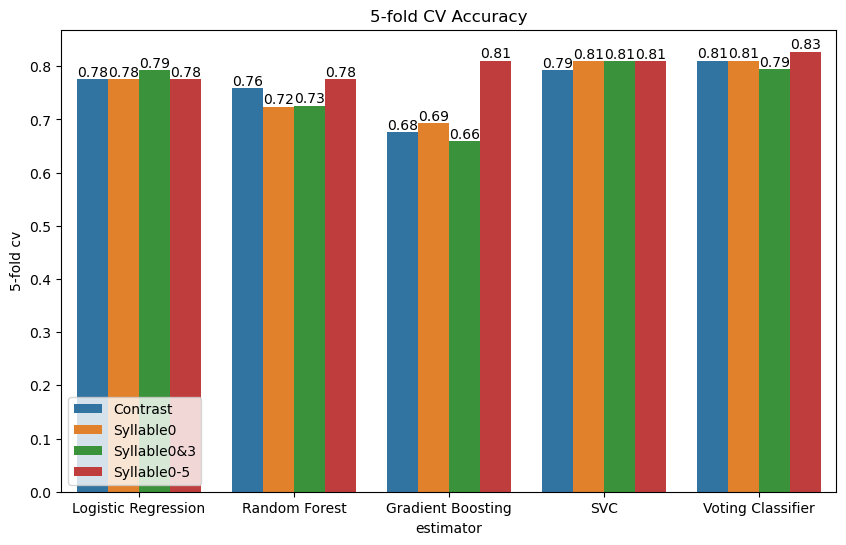

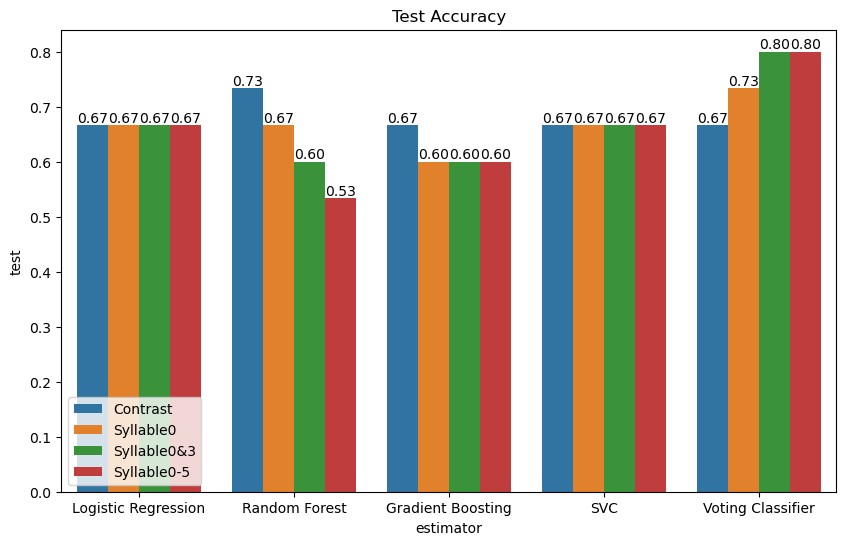

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制5-fold CV Accuracy
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='estimator', y='5-fold cv', hue='syllable', data=all_estimators_df)
plt.legend(loc='lower left')
plt.title('5-fold CV Accuracy')

# 对每个bar逐个添加标签
for bar in bar_plot.containers:
    for b in bar:
        b_height = b.get_height()
        b_x = b.get_x() + b.get_width() / 2
        plt.text(b_x, b_height, f'{b_height:.2f}', ha='center', va='bottom')

plt.show()

# 绘制Test Accuracy
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='estimator', y='test', hue='syllable', data=all_estimators_df)
plt.legend(loc='lower left')
plt.title('Test Accuracy')

# 对每个bar逐个添加标签
for bar in bar_plot.containers:
    for b in bar:
        b_height = b.get_height()
        b_x = b.get_x() + b.get_width() / 2
        plt.text(b_x, b_height, f'{b_height:.2f}', ha='center', va='bottom')

plt.show()

### visualization for feature importance

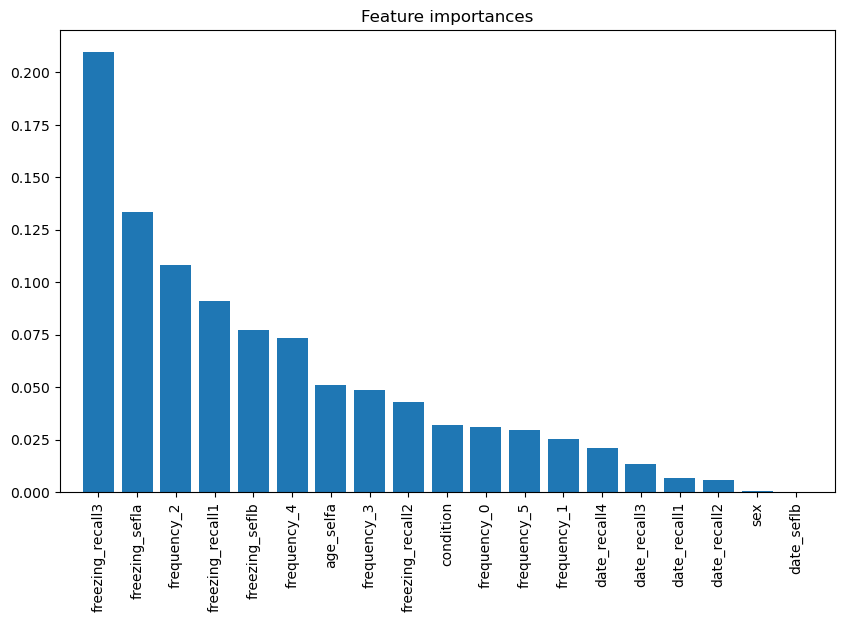

In [35]:
## the fearture importance for the estimators_1_df
rf.fit(X2_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X2_train.columns

# Plot the feature importances of the forest, the X is the features, y is the importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X2_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X2_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X2_train.shape[1]])
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error

def model_importance(models, X_train, y_train, X_test, y_test, name="SEFL_WITHOUT"):
    model_importances = {}
    mse_list = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            features_importance = dict(zip(X_train.columns, importances))
            sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
            model_importances[model_name] = sorted_importances
        else:
            model_importances[model_name] = "This model doesn't support feature importance."

        mse_entry = {
            'name': name,
            'method': model_name,
            'mse': test_mse
        }
        mse_list.append(mse_entry)

    return model_importances, mse_list

In [37]:

def model_importance(models, X_train, y_train, X_test, y_test, name="SEFL_WITHOUT"):
    feature_importance_df = pd.DataFrame()
    mse_list = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            model_importances = pd.DataFrame({
                'feature': X_train.columns,
                'importance': importances,
                'model': model_name
            })
            feature_importance_df = pd.concat([feature_importance_df, model_importances], ignore_index=True)
        else:
            print(f"{model_name} does not support feature importance.")

        mse_entry = {
            'name': name,
            'method': model_name,
            'mse': test_mse
        }
        mse_list.append(mse_entry)

    return feature_importance_df, mse_list

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import random

random.seed(0)
## use three models to define the feature importance
models_imp = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

In [39]:
## do 5-fold cross validation, on X2, y, get the mean value of the feature importance
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
# Initialize the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store feature importances and MSEs for each model
model_feature_importances = {model_name: [] for model_name in models_imp.keys()}
model_mse = {model_name: [] for model_name in models_imp.keys()}

# Perform cross-validation for each model
for train_index, test_index in kf.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Iterate through each model and compute feature importance and MSE
    for model_name, model in models_imp.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Calculate predictions and MSE
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # Store MSE
        model_mse[model_name].append(test_mse)
        
        # Check if model supports feature importances
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': importances
            })
            model_feature_importances[model_name].append(feature_importance)

# Calculate the average feature importance and MSE for each model
average_feature_importances = {}
average_mse = {}

for model_name in models_imp.keys():
    # Concatenate feature importances across folds and calculate the mean
    all_importances = pd.concat(model_feature_importances[model_name])
    avg_importance = all_importances.groupby('feature')['importance'].mean()
    average_feature_importances[model_name] = avg_importance
    
    # Calculate the mean MSE across folds
    average_mse[model_name] = np.mean(model_mse[model_name])

# Display results
for model_name in models_imp.keys():
    print(f"\nModel: {model_name}")
    print("Average Feature Importances:")
    print(average_feature_importances[model_name])


Model: Decision Tree Regressor
Average Feature Importances:
feature
age_selfa           0.000000
condition           0.000000
date_recall1        0.000000
date_recall2        0.000000
date_recall3        0.017077
date_recall4        0.000000
date_seflb          0.000000
freezing_recall1    0.016389
freezing_recall2    0.037085
freezing_recall3    0.572840
freezing_sefla      0.040049
freezing_seflb      0.026071
frequency_0         0.006092
frequency_1         0.000000
frequency_2         0.026419
frequency_3         0.049594
frequency_4         0.161845
frequency_5         0.046537
sex                 0.000000
Name: importance, dtype: float64

Model: Random Forest Regressor
Average Feature Importances:
feature
age_selfa           0.016894
condition           0.001272
date_recall1        0.004874
date_recall2        0.002779
date_recall3        0.002229
date_recall4        0.008531
date_seflb          0.000000
freezing_recall1    0.032993
freezing_recall2    0.076393
freezing_recall3 

In [40]:
average_feature_importances_df = pd.DataFrame(average_feature_importances)
average_feature_importances_df['mean'] = average_feature_importances_df.mean(axis=1)
average_feature_importances_df.sort_values(by='mean', ascending=False, inplace=True)
average_feature_importances_df.reset_index(inplace=True)
average_feature_importances_df

,feature,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,mean
0,freezing_recall3,0.572840,0.431206,0.524598,0.509548
1,frequency_4,0.161845,0.087423,0.140422,0.129897
2,freezing_sefla,0.040049,0.108812,0.065457,0.071440
3,freezing_recall2,0.037085,0.076393,0.057936,0.057138
4,frequency_3,0.049594,0.047600,0.052738,0.049977
5,frequency_2,0.026419,0.058474,0.037736,0.040876
6,frequency_5,0.046537,0.028426,0.038483,0.037815
7,freezing_seflb,0.026071,0.044688,0.018363,0.029707
8,freezing_recall1,0.016389,0.032993,0.006772,0.018718
9,frequency_0,0.006092,0.025267,0.011747,0.014369


<Figure size 1200x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

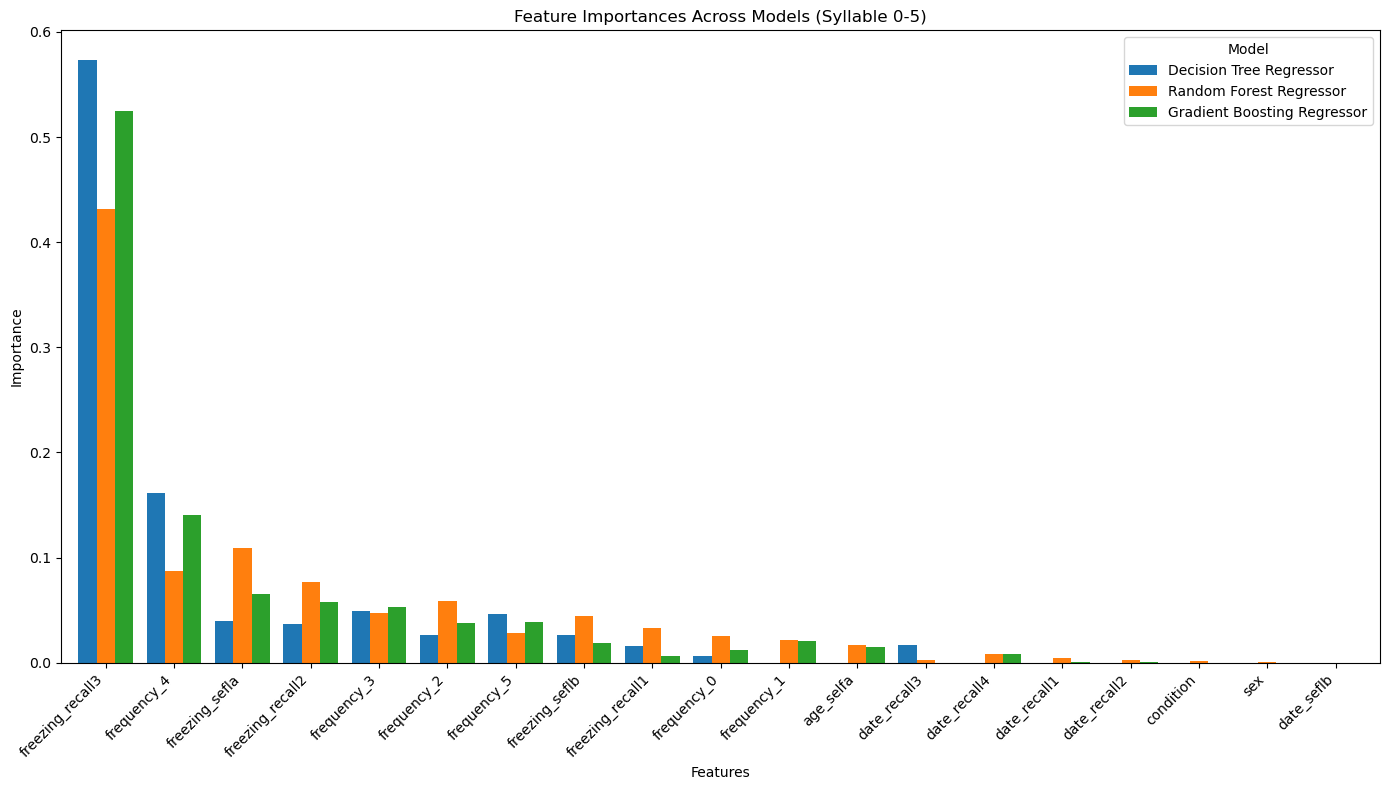

In [41]:
# 设置图形大小
plt.figure(figsize=(12, 8))

# 绘制条形图，每个模型的特征重要性为不同颜色
# 设置图形大小
plt.figure(figsize=(14, 8))

# 使用特征名称作为x轴标签
average_feature_importances_df.drop(columns=['mean']).plot(
    kind='bar', 
    stacked=False, 
    figsize=(14, 8), 
    width=0.8,
    legend=True
)

# 添加标题和标签
plt.title('Feature Importances Across Models (Syllable 0-5)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.legend(title='Model',loc='upper right')
plt.xticks(ticks=range(len(average_feature_importances_df)), labels=average_feature_importances_df['feature'], rotation=45, ha='right')
plt.tight_layout()

# 显示图形
plt.show()

### visualization of AUC curve

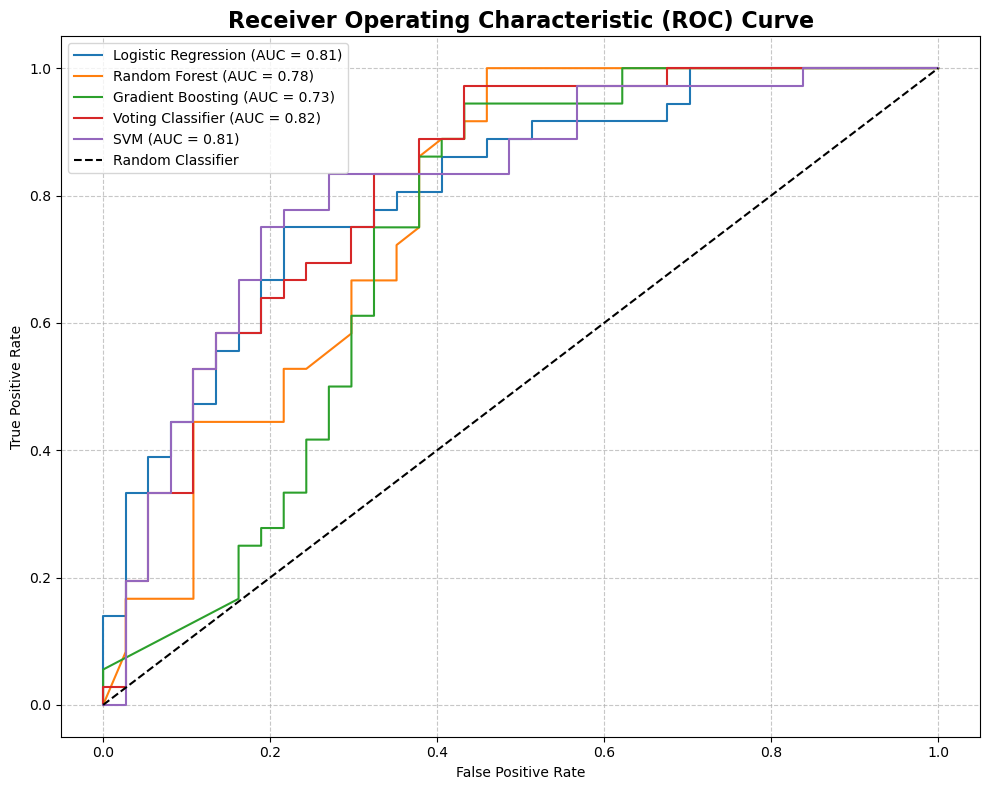

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Initialize the models
models = [
    logreg,
    rf,
    GradientBoostingClassifier(),
    voting_clf2,
    svc
]

# Define the labels for the legend
labels = [
    'Logistic Regression',
    'Random Forest',
    'Gradient Boosting',
    'Voting Classifier',
    'SVM'
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over the models and labels
for model, label in zip(models, labels):
    # Get the predicted probabilities
    y_prob = cross_val_predict(model, X2, y, cv=5, method='predict_proba')
    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(y, y_prob[:, 1])
    # Compute the AUC
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot the random classifier
ax.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier')

# Add labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
X_contrast

,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,date_recall4,condition,sex,age_selfa
0,5.03,0.45,1.0,8.28,2.0,7.12,5.0,7.57,7.0,21.0,0.0,1.0,71.0
15,8.83,4.20,1.0,28.80,2.0,11.14,5.0,3.22,7.0,21.0,0.0,1.0,71.0
30,2.60,2.73,1.0,14.97,2.0,11.68,5.0,9.80,7.0,21.0,0.0,1.0,71.0
44,1.91,2.53,1.0,14.42,2.0,3.11,5.0,2.94,7.0,21.0,0.0,1.0,71.0
56,50.64,10.14,1.0,25.39,2.0,27.24,5.0,11.23,7.0,21.0,1.0,1.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,63.66,33.77,1.0,19.53,2.0,47.70,9.0,43.75,16.0,30.0,1.0,1.0,91.0
897,47.50,35.16,1.0,70.82,2.0,63.19,9.0,35.71,16.0,30.0,1.0,1.0,91.0
909,64.57,15.88,1.0,32.56,2.0,48.10,9.0,29.46,16.0,30.0,1.0,1.0,91.0
925,64.38,26.80,1.0,52.61,2.0,53.21,9.0,31.25,16.0,30.0,1.0,1.0,91.0


In [ ]:
# ### Bootstrap the error bar of the accuracy of the model, we are comparing the X_contrast, X, X1, X2, only use the voting_clf2
# from sklearn.utils import resample
# from sklearn.metrics import accuracy_score

# # Initialize the model
# model = voting_clf2

# # Define the number of bootstrap samples
# n_samples = 100

# # Initialize lists to store the accuracy scores
# accuracy_contrast = []
# accuracy_syllable0 = []
# accuracy_syllable03 = []
# accuracy_syllable05 = []

# # Perform bootstrapping
# for _ in range(n_samples):
#     # Bootstrap the data
#     X_contrast_boot = resample(X_contrast_train, n_samples=X_contrast_train.shape[0], random_state=0)
#     X_boot = resample(X_train, n_samples=X_train.shape[0], random_state=0)
#     X1_boot = resample(X1_train, n_samples=X1_train.shape[0], random_state=0)
#     X2_boot = resample(X2_train, n_samples=X2_train.shape[0], random_state=0)
    
#     # Fit the model
#     model.fit(X_contrast_boot, y_train)
#     y_pred_contrast = model.predict(X_contrast_test)
#     accuracy_contrast.append(accuracy_score(y_test, y_pred_contrast))
    
#     model.fit(X_boot, y_train)
#     y_pred_syllable0 = model.predict(X_test)
#     accuracy_syllable0.append(accuracy_score(y_test, y_pred_syllable0))
    
#     model.fit(X1_boot, y_train)
#     y_pred_syllable03 = model.predict(X1_test)
#     accuracy_syllable03.append(accuracy_score(y_test, y_pred_syllable03))
    
#     model.fit(X2_boot, y_train)
#     y_pred_syllable05 = model.predict(X2_test)
#     accuracy_syllable05.append(accuracy_score(y_test, y_pred_syllable05))

# # Calculate the mean and standard deviation of the accuracy scores
# accuracy_contrast_mean = np.mean(accuracy_contrast)
# accuracy_contrast_std = np.std(accuracy_contrast)

# accuracy_syllable0_mean = np.mean(accuracy_syllable0)
# accuracy_syllable0_std = np.std(accuracy_syllable0)

# accuracy_syllable03_mean = np.mean(accuracy_syllable03)
# accuracy_syllable03_std = np.std(accuracy_syllable03)

# accuracy_syllable05_mean = np.mean(accuracy_syllable05)
# accuracy_syllable05_std = np.std(accuracy_syllable05)

ValueError: Found input variables with inconsistent numbers of samples: [59, 58]

# contrast（take out the recall 3, recall 2, keep recall1 sefla seflb)

In [44]:
## without recall 1
X6 = syllable05_data.drop(columns=['freezing_recall4', 'freezing_recall3', 'freezing_recall2','freezing_recall1','cohort_id'])
X6 = X6.astype(float)  # Ensure features are float type
y = syllable05_data['freezing_recall4'].astype(int)  # Convert target to int


X6_train, X6_test, y_train, y_test = train_test_split(X6, y, test_size=0.2, random_state=0)
estimators_6_df = individual_estimators(estimators, X_train=X6_train, X_test = X6_test, y_train=y_train, y_test = y_test)
## with recall 1
X5 = syllable0_data.drop(columns=['freezing_recall4',  'freezing_recall3','freezing_recall2','cohort_id', 'syllable', 'duration', 'frequency'])
X5 = X5.astype(float)  # Ensure features are float type

X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=0)
estimator_7_df = individual_estimators(estimators, X_train=X5_train, X_test = X5_test, y_train=y_train, y_test = y_test)
print(estimators_6_df)
print(estimator_7_df)

     estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.827273  0.666667
2        boost   0.825758  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.775758  0.666667
     estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.792424  0.666667
2        boost   0.689394  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.759091  0.666667


Overfitting problem is very serious if we delete the freezing_recall3

## Solving overfitting

### feature selection

#### PCA

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialize the StandardScaler and PCA
scaler = StandardScaler()

# decrease the dimension into 2
X5_train_scaled = scaler.fit_transform(X5_train)
X5_train_pca = PCA(n_components=2).fit_transform(X5_train_scaled)

# to test dataset
X5_test_scaled = scaler.transform(X5_test)
X5_test_pca = PCA(n_components=2).fit_transform(X5_test_scaled)

estimators_8_df = individual_estimators(estimators, X_train=X5_train_pca, X_test = X5_test_pca, y_train=y_train, y_test = y_test)
print(estimators_8_df)


     estimator  5-fold cv      test
0       logreg   0.792424  0.733333
1           rf   0.742424  0.800000
2        boost   0.659091  0.800000
3          svc   0.742424  0.733333
4  voting_clf2   0.775758  0.800000


In [46]:
## without recall 1
scaler  = StandardScaler()
X6_train_scaled = scaler.fit_transform(X6_train)
X6_train_pca = PCA(n_components=2).fit_transform(X6_train_scaled)

X6_test_scaled = scaler.transform(X6_test)
X6_test_pca = PCA(n_components=2).fit_transform(X6_test_scaled)

estimators_9_df = individual_estimators(estimators, X_train=X6_train_pca, X_test = X6_test_pca, y_train=y_train, y_test = y_test)
print(estimators_9_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.733333
1           rf   0.757576  0.600000
2        boost   0.721212  0.533333
3          svc   0.775758  0.733333
4  voting_clf2   0.792424  0.733333


In [68]:
## use estimators_6_df, estimator_7_df, estimators_8_df, estimators_9_df to plot the accuracy, first two before PCA is one plot, second two after PCA is another plot
estimators_6_df['pca'] = 'Without PCA'
estimator_7_df['pca'] = 'Without PCA'
estimators_8_df['pca'] = 'With PCA'
estimators_9_df['pca'] = 'With PCA'
all_estimators_pca_df = pd.concat([estimators_6_df, estimator_7_df, estimators_8_df, estimators_9_df], axis=0)
all_estimators_pca_df



,estimator,5-fold cv,test,pca
0,logreg,0.759091,0.600000,Without PCA
1,rf,0.827273,0.666667,Without PCA
2,boost,0.825758,0.600000,Without PCA
3,svc,0.756061,0.600000,Without PCA
4,voting_clf2,0.775758,0.666667,Without PCA
0,logreg,0.759091,0.600000,Without PCA
1,rf,0.792424,0.666667,Without PCA
2,boost,0.689394,0.600000,Without PCA
3,svc,0.756061,0.600000,Without PCA
4,voting_clf2,0.759091,0.666667,Without PCA


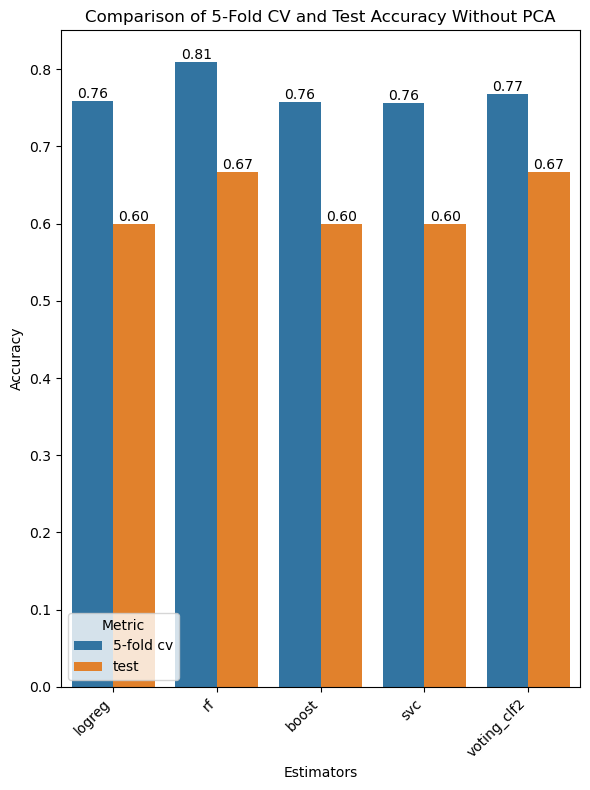

In [73]:
## plot the without PCA, with X as the estimators, y as the 5-fold cv and the test accuracy, 
# Filter data to include only rows without PCA
filtered_data1 = all_estimators_pca_df[all_estimators_pca_df['pca'] == 'Without PCA']

# Melt the DataFrame to bring '5-fold cv' and 'test' accuracy into a common column
melted_data1 = filtered_data1.melt(id_vars=['estimator'], 
                                 value_vars=['5-fold cv', 'test'], 
                                 var_name='Metric', 
                                 value_name='Accuracy')

# Plotting
plt.figure(figsize=(6, 8))
bar_plot = sns.barplot(x='estimator', y='Accuracy', hue='Metric', data=melted_data1, ci=None)

# Adding titles and labels for clarity
plt.title('Comparison of 5-Fold CV and Test Accuracy Without PCA')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
plt.legend(title='Metric', loc='lower left')
plt.tight_layout()

## add lable for each bar
for bar in bar_plot.containers:
    for b in bar:
        b_height = b.get_height()
        b_x = b.get_x() + b.get_width() / 2
        plt.text(b_x, b_height, f'{b_height:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()

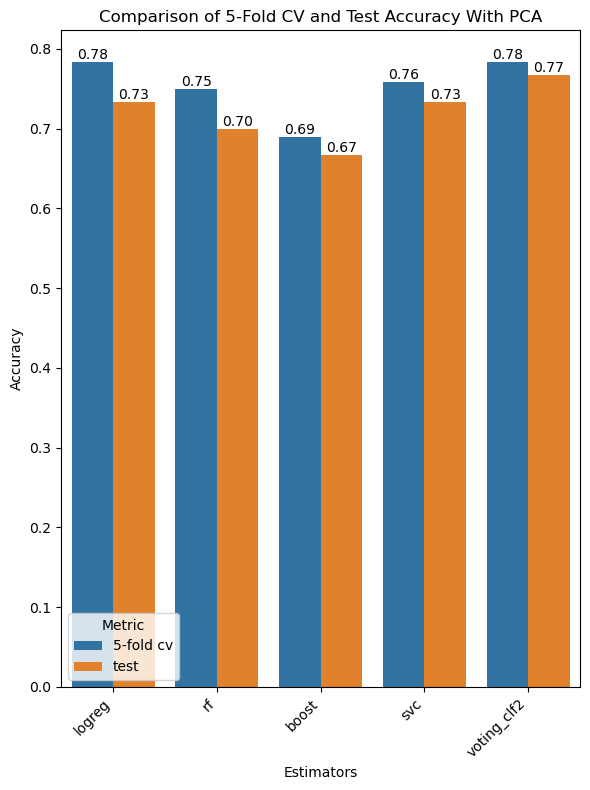

In [74]:
## plot the with PCA, with X as the estimators, y as the 5-fold cv and the test accuracy,
filtered_data2 = all_estimators_pca_df[all_estimators_pca_df['pca'] == 'With PCA']

# Melt the DataFrame to bring '5-fold cv' and 'test' accuracy into a common column
melted_data2 = filtered_data2.melt(id_vars=['estimator'], 
                                 value_vars=['5-fold cv', 'test'], 
                                 var_name='Metric', 
                                 value_name='Accuracy')

# Plotting
plt.figure(figsize=(6, 8))
bar_plot = sns.barplot(x='estimator', y='Accuracy', hue='Metric', data=melted_data2, ci=None)

# Adding titles and labels for clarity
plt.title('Comparison of 5-Fold CV and Test Accuracy With PCA')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
plt.legend(title='Metric', loc='lower left')
plt.tight_layout()

## add lable for each bar
for bar in bar_plot.containers:
    for b in bar:
        b_height = b.get_height()
        b_x = b.get_x() + b.get_width() / 2
        plt.text(b_x, b_height, f'{b_height:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()

In [47]:
pca = PCA(n_components=2)

# Step 1: Fit PCA on the training data
X5_train_pca = pca.fit_transform(X5_train_scaled)

## write down the components in PCA1 and PCA2
pca_X5_train_df = pd.DataFrame(X5_train_pca, columns=[f'PC{i+1}' for i in range(X5_train_pca.shape[1])])

# Step 5: Interpret PCA Results
# Get the feature loadings (components) to understand which features explain the most variance
loadings = pd.DataFrame(pca.components_.T, index=X5_train.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Feature Loadings for Principal Components:")
print(loadings.round(2))

Feature Loadings for Principal Components:
                   PC1   PC2
freezing_sefla   -0.15  0.48
freezing_seflb   -0.12  0.50
date_seflb        0.00 -0.00
freezing_recall1 -0.22  0.41
date_recall1      0.44  0.11
date_recall2      0.45  0.15
date_recall3      0.44  0.17
date_recall4      0.41  0.11
condition        -0.16  0.46
sex              -0.32 -0.25
age_selfa        -0.17  0.12


PCA is not good for interpret.

#### Factor Analysis

In [48]:
from sklearn.decomposition import FactorAnalysis

X5_train_fa = FactorAnalysis(n_components=5).fit_transform(X5_train_scaled)
X5_test_fa = FactorAnalysis(n_components=5).fit_transform(X5_test_scaled)

estimators_10_df = individual_estimators(estimators, X_train=X5_train_fa, X_test = X5_test_fa, y_train=y_train, y_test = y_test)
print(estimators_10_df)

X6_train_fa = FactorAnalysis(n_components=5).fit_transform(X6_train_scaled)
X6_test_fa = FactorAnalysis(n_components=5).fit_transform(X6_test_scaled)

estimators_11_df = individual_estimators(estimators, X_train=X6_train_fa, X_test = X6_test_fa, y_train=y_train, y_test = y_test)
print(estimators_11_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.733333
1           rf   0.792424  0.733333
2        boost   0.825758  0.666667
3          svc   0.775758  0.666667
4  voting_clf2   0.775758  0.666667
     estimator  5-fold cv      test
0       logreg   0.792424  0.600000
1           rf   0.706061  0.600000
2        boost   0.690909  0.666667
3          svc   0.774242  0.666667
4  voting_clf2   0.792424  0.600000


#### feature selection

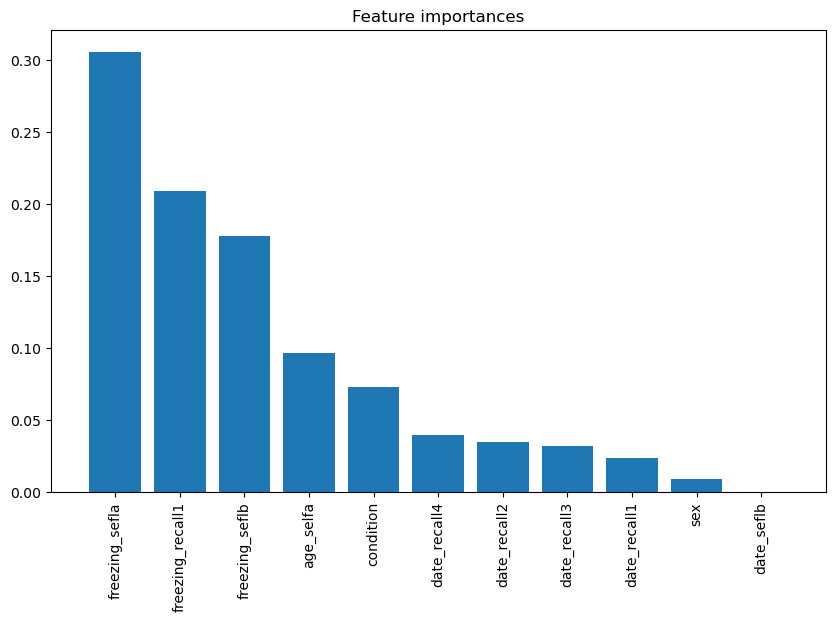

In [49]:
rf.fit(X5_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X5_train.columns

# Plot the feature importances of the forest, the X is the features, y is the importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X5_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X5_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X5_train.shape[1]])
plt.show()

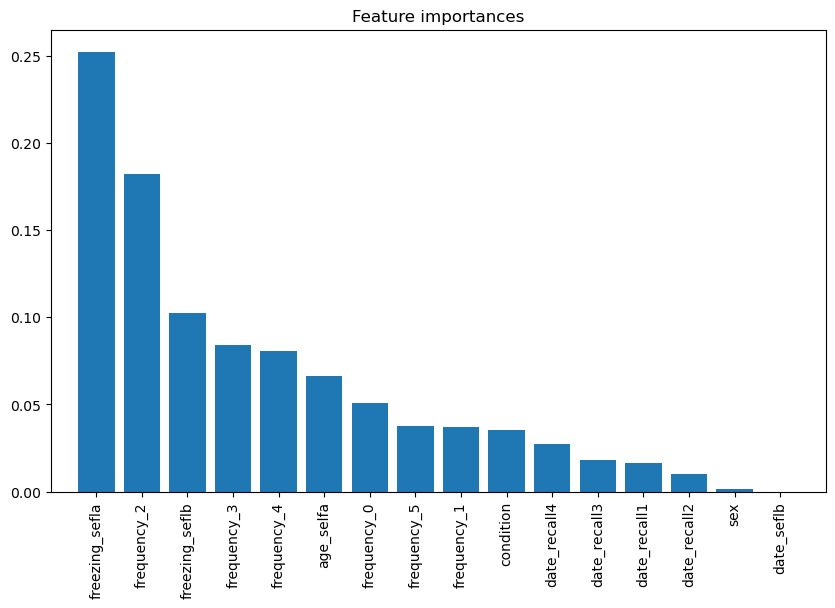

In [50]:
## without recall 1
rf.fit(X6_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X6_train.columns

# Plot the feature importances of the forest, the X is the features, y is the importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X6_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X6_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X6_train.shape[1]])
plt.show()

In [51]:
## choose the top 5 features seperately for X5 and X6
X5_train_top5 = X5_train[['freezing_sefla', 'freezing_recall1', 'freezing_seflb', 'age_selfa', 'condition']]
X6_train_top5 = X6_train[['freezing_sefla','freezing_seflb', 'frequency_2', 'frequency_3', 'frequency_4']]

X5_test_top5 = X5_test[['freezing_sefla', 'freezing_recall1', 'freezing_seflb', 'age_selfa', 'condition']]
X6_test_top5 = X6_test[['freezing_sefla','freezing_seflb', 'frequency_2', 'frequency_3', 'frequency_4']]

estimators_12_df = individual_estimators(estimators, X_train=X5_train_top5, X_test = X5_test_top5, y_train=y_train, y_test = y_test)
estimators_13_df = individual_estimators(estimators, X_train=X6_train_top5, X_test = X6_test_top5, y_train=y_train, y_test = y_test)

print(estimators_12_df)
print(estimators_13_df)

     estimator  5-fold cv      test
0       logreg   0.775758  0.666667
1           rf   0.774242  0.600000
2        boost   0.689394  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.775758  0.666667
     estimator  5-fold cv      test
0       logreg   0.774242  0.600000
1           rf   0.827273  0.466667
2        boost   0.775758  0.400000
3          svc   0.756061  0.600000
4  voting_clf2   0.790909  0.666667


Only improve a little bit on the cv scores

# Add all feature into one cohort

## All fequency

In [52]:
## Mosic data
data.head()

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,condition,cohort_id
0,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,0.232744,1.777517,-3.063490,3.102825,-3.404097,28.309280,-185.965050,10.971327,63.939822,50.259249,3.593064,247.028322,0.150,0.488889,0,ptsd5_2
1,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,-0.246350,0.178788,-0.327780,0.157195,2.046138,1.447916,0.512935,4.477111,83.506169,20.152680,53.328766,112.365485,0.025,0.466667,0,ptsd5_2
2,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,-2.981436,0.045551,-3.070323,-2.906338,1.836780,18.796499,-1.255300,186.954564,20.015562,12.571853,1.510919,64.336373,0.050,3.300000,0,ptsd5_2
3,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,-0.074325,0.108754,-0.246370,0.060003,-0.025601,0.218436,-0.392321,0.553747,19.978555,13.389197,4.364641,66.100139,0.075,0.888889,0,ptsd5_2
4,female and control,5_02DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,0.982853,1.533064,-0.062210,3.068792,-10.436042,26.455294,-80.826015,-0.241989,98.586184,44.241426,41.888859,190.414703,0.025,0.600000,0,ptsd5_2


In [53]:
syllable_list = data['syllable'].unique()
syllable_list

array([ 0,  1,  2,  3,  4,  5,  7, 10, 11, 13, 14, 17, 19,  6,  9, 16,  8,
       12, 18, 15], dtype=int64)

In [54]:
## pivot the data by cohort_id , the columns are the syllable_list, and the values are the frequency
pivoted_data = data.pivot_table(index='cohort_id', columns='syllable', values='frequency', aggfunc='first')
pivoted_data.reset_index(inplace=True)
pivoted_data.fillna(0, inplace=True)
pivoted_data

syllable,cohort_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,ptsd2_81,0.203390,0.084746,0.016949,0.084746,0.084746,0.067797,0.033898,0.016949,0.084746,...,0.016949,0.033898,0.016949,0.000000,0.016949,0.016949,0.000000,0.000000,0.000000,0.000000
1,ptsd2_82,0.161290,0.064516,0.177419,0.064516,0.096774,0.032258,0.080645,0.096774,0.016129,...,0.080645,0.000000,0.000000,0.016129,0.032258,0.016129,0.016129,0.000000,0.000000,0.000000
2,ptsd2_83,0.186047,0.116279,0.209302,0.116279,0.069767,0.000000,0.023256,0.011628,0.000000,...,0.046512,0.034884,0.011628,0.023256,0.011628,0.000000,0.000000,0.011628,0.000000,0.011628
3,ptsd2_84,0.175676,0.121622,0.027027,0.094595,0.067568,0.081081,0.040541,0.027027,0.081081,...,0.027027,0.067568,0.000000,0.027027,0.027027,0.013514,0.000000,0.000000,0.013514,0.000000
4,ptsd2_85,0.186667,0.146667,0.053333,0.160000,0.026667,0.040000,0.053333,0.040000,0.026667,...,0.026667,0.013333,0.026667,0.026667,0.013333,0.026667,0.013333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,ptsd9_30-2,0.181818,0.022727,0.113636,0.068182,0.159091,0.022727,0.000000,0.068182,0.000000,...,0.136364,0.000000,0.000000,0.022727,0.022727,0.000000,0.022727,0.022727,0.022727,0.000000
70,ptsd9_30-5,0.127660,0.063830,0.085106,0.127660,0.148936,0.063830,0.021277,0.085106,0.000000,...,0.085106,0.000000,0.000000,0.063830,0.021277,0.000000,0.000000,0.021277,0.021277,0.000000
71,ptsd9_31-1,0.090909,0.060606,0.060606,0.151515,0.181818,0.060606,0.000000,0.121212,0.000000,...,0.121212,0.000000,0.000000,0.030303,0.030303,0.000000,0.000000,0.060606,0.030303,0.000000
72,ptsd9_31-2,0.162162,0.027027,0.270270,0.027027,0.027027,0.054054,0.027027,0.000000,0.000000,...,0.081081,0.000000,0.000000,0.000000,0.081081,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
## merge the pivoted_data with the freezing_data
mosic_frequency_data = pd.merge(freezing_data, pivoted_data, how='left', on='cohort_id')
mosic_frequency_data

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,...,10,11,12,13,14,15,16,17,18,19
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,...,0.016949,0.033898,0.016949,0.000000,0.016949,0.016949,0.000000,0.000000,0.000000,0.000000
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,...,0.080645,0.000000,0.000000,0.016129,0.032258,0.016129,0.016129,0.000000,0.000000,0.000000
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,...,0.022727,0.022727,0.000000,0.022727,0.000000,0.068182,0.022727,0.000000,0.000000,0.000000
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,...,0.000000,0.031250,0.000000,0.031250,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000
4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,...,0.027027,0.067568,0.000000,0.027027,0.027027,0.013514,0.000000,0.000000,0.013514,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,...,0.037037,0.037037,0.018519,0.074074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
69,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,...,0.055556,0.000000,0.000000,0.027778,0.055556,0.000000,0.000000,0.000000,0.083333,0.000000
70,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,...,0.061538,0.000000,0.015385,0.061538,0.046154,0.030769,0.000000,0.000000,0.030769,0.015385
71,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,...,0.121212,0.000000,0.000000,0.030303,0.030303,0.000000,0.000000,0.060606,0.030303,0.000000


In [56]:
## split the data into X and y
X_mosic = mosic_frequency_data.drop(columns=['freezing_recall4', 'freezing_recall3','freezing_recall2','freezing_recall1',
                                             'cohort_id'])
X_mosic.columns = X_mosic.columns.astype(str)
X_mosic = X_mosic.astype(float)  # Ensure features are float type
y = mosic_frequency_data['freezing_recall4'].astype(int)  # Convert target to int

In [57]:
X_mosic_train, X_mosic_test, y_train, y_test = train_test_split(X_mosic, y, test_size=0.2, random_state=0)
estimators_17_df = individual_estimators(estimators, X_train=X_mosic_train, X_test = X_mosic_test, y_train=y_train, y_test = y_test)
print(estimators_17_df)

     estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.775758  0.466667
2        boost   0.777273  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.759091  0.666667


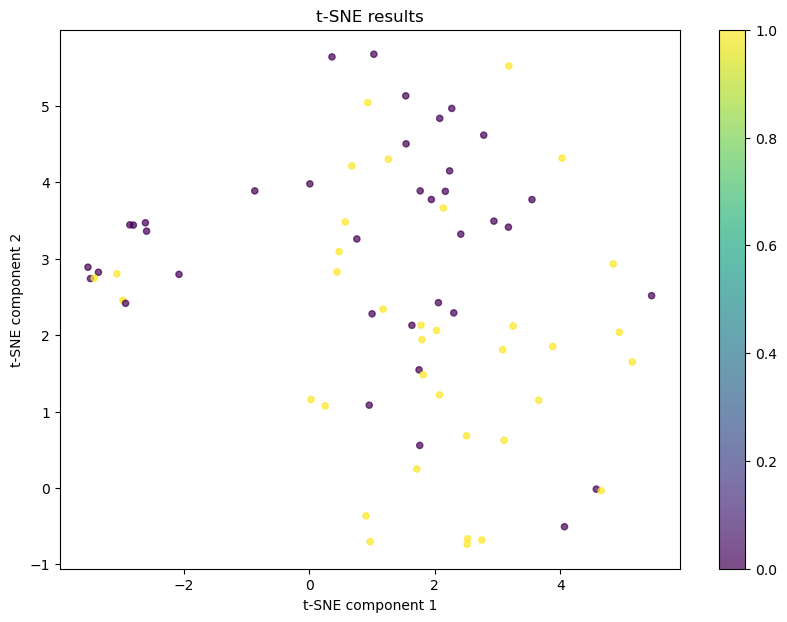

In [58]:
from sklearn.manifold import TSNE
# Optional: You can normalize the data to get better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_mosic_scaled = scaler.fit_transform(X_mosic)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 components for visualization
X_tsne = tsne.fit_transform(X_mosic_scaled)

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=20, alpha=0.7)
plt.colorbar()
plt.title("t-SNE results")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

In [59]:
## split data
X_mosic_train, X_mosic_test, y_train, y_test = train_test_split(X_mosic, y, test_size=0.2, random_state=0)
## scalar the data
scaler = StandardScaler()
X_mosic_train_scaled = scaler.fit_transform(X_mosic_train)
X_mosic_test_scaled = scaler.transform(X_mosic_test)

### LASSO

In [60]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso = Lasso(alpha=0.1, random_state=0)
lasso.fit(X_mosic_train_scaled, y_train)

# Get the feature importances
lasso_coefficients = pd.Series(lasso.coef_, index=X_mosic.columns)
important_features = lasso_coefficients[lasso_coefficients != 0].index
print("Selected Important Features:", list(important_features))


Selected Important Features: ['freezing_sefla', '3', '8']


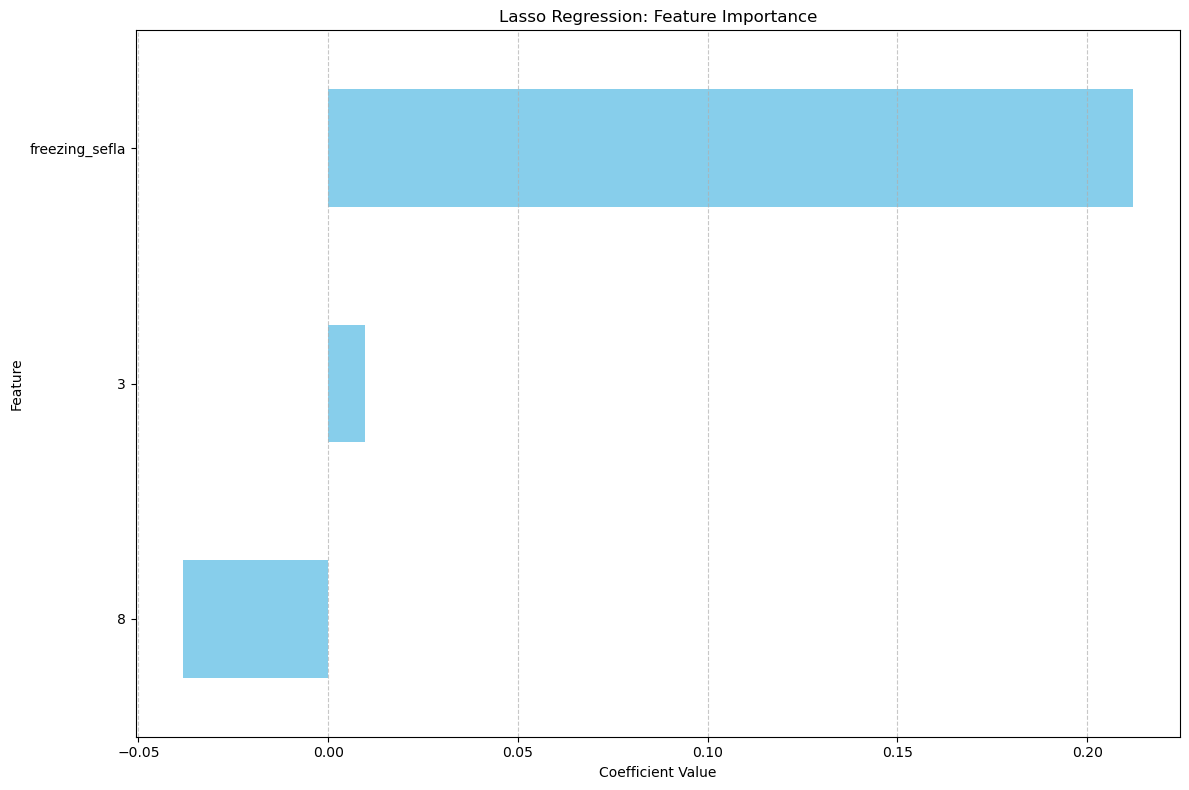

In [76]:
non_zero_coefficients = lasso_coefficients[lasso_coefficients != 0]

# Plotting the important features
plt.figure(figsize=(12, 8))
non_zero_coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title('Lasso Regression: Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

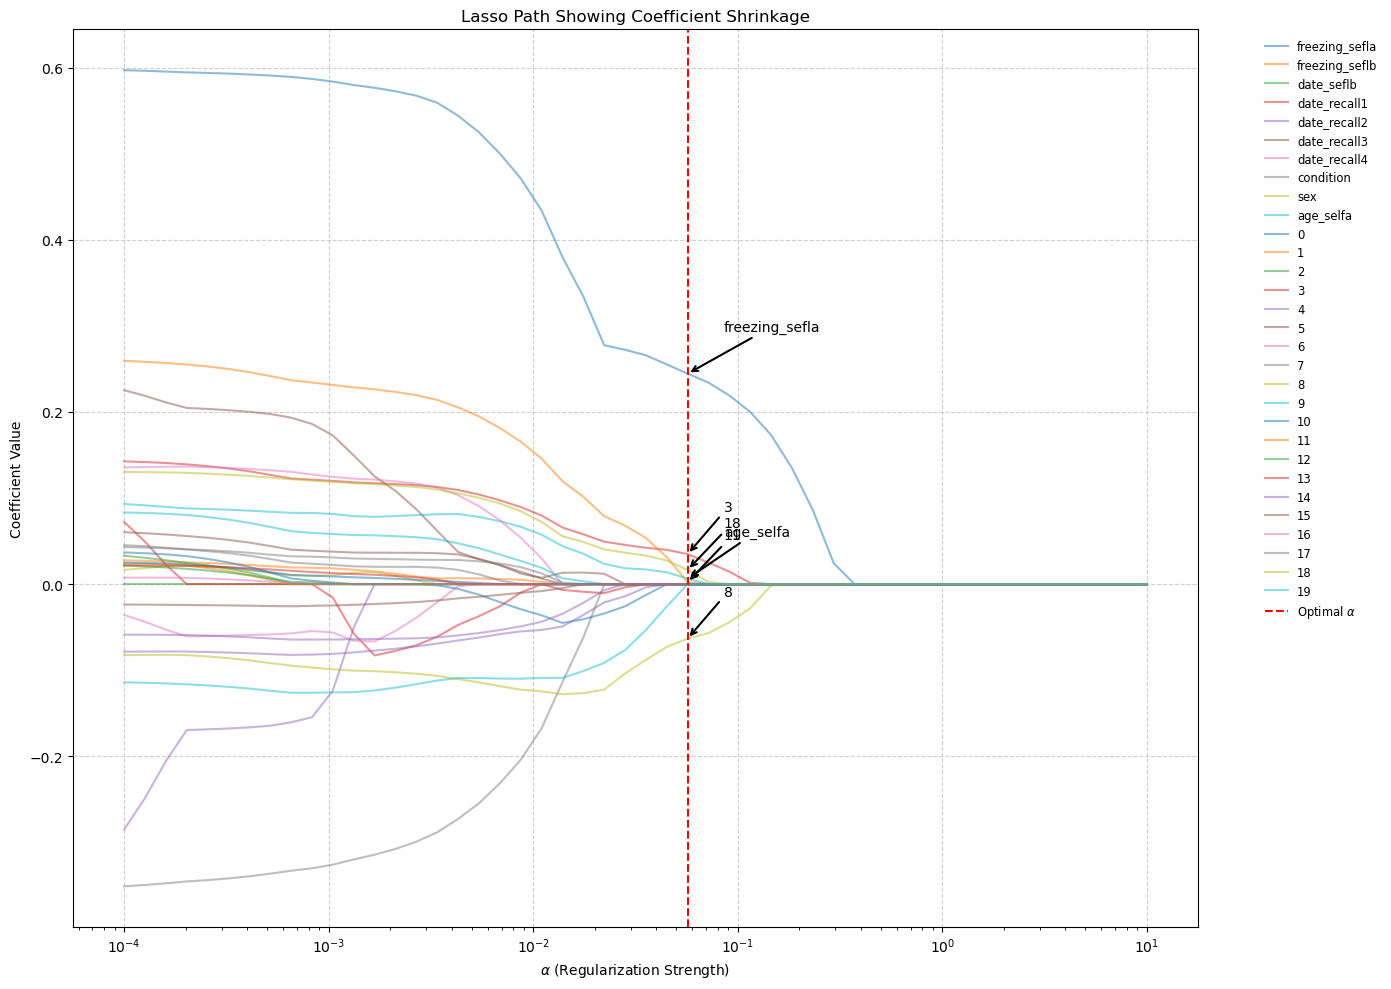

In [79]:
from sklearn.linear_model import LassoCV


# Perform Lasso with cross-validation to determine coefficients for various alpha values
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, random_state=0)
lasso_cv.fit(X_mosic_train_scaled, y_train)

# Extract alphas and coefficients from LassoCV
alphas = lasso_cv.alphas_  # Different values of alpha
coefs = lasso_cv.path(X_mosic_train_scaled, y_train, alphas=alphas)[1]  # Coefficients at each alpha

# Plotting the shrinkage process
plt.figure(figsize=(14, 10))
n_features = coefs.shape[0]

for i in range(n_features):
    plt.plot(alphas, coefs[i], label=X_mosic.columns[i] if i < len(X_mosic.columns) else None, alpha=0.5)

# Set the plot to be log-scaled for alpha
plt.xscale('log')
plt.xlabel(r'$\alpha$ (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Path Showing Coefficient Shrinkage')
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', label=r'Optimal $\alpha$')
plt.grid(True, linestyle='--', alpha=0.6)

# Label the selected features with non-zero coefficients at optimal alpha
optimal_coefs = lasso_cv.coef_  # Coefficients at the optimal alpha
for i in range(n_features):
    if optimal_coefs[i] != 0:
        # Find the coordinate where the label should be added (close to the optimal alpha)
        x_pos = lasso_cv.alpha_
        y_pos = optimal_coefs[i]
        plt.annotate(X_mosic.columns[i],
                     xy=(x_pos, y_pos),
                     xytext=(x_pos * 1.5, y_pos + 0.05),  # Adjust the label position for better readability
                     textcoords='data',
                     arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
                     fontsize=10,
                     color='black')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', frameon=False)
plt.tight_layout()
plt.show()

In [65]:
mosic_frequency_data.columns

Index([       'cohort_id',   'freezing_sefla',   'freezing_seflb',
             'date_seflb', 'freezing_recall1',     'date_recall1',
       'freezing_recall2',     'date_recall2', 'freezing_recall3',
           'date_recall3', 'freezing_recall4',     'date_recall4',
              'condition',              'sex',        'age_selfa',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19],
      dtype='object')

In [62]:
## choose the frequency 3 and 8
X_mosic_lasso_select = X_mosic[['freezing_sefla', 'condition', 'sex', 'age_selfa','3', '8']]

X_mosic_lasso_select_train, X_mosic_lasso_select_test, y_train, y_test = train_test_split(X_mosic_lasso_select, y, test_size=0.2, random_state=0)

estimators_14_df = individual_estimators(estimators, X_train=X_mosic_lasso_select_train, X_test = X_mosic_lasso_select_test, y_train=y_train, y_test = y_test)
print(estimators_14_df)
print(estimator_7_df)
print(estimators_6_df)

     estimator  5-fold cv      test
0       logreg   0.759091  0.666667
1           rf   0.809091  0.600000
2        boost   0.740909  0.666667
3          svc   0.756061  0.600000
4  voting_clf2   0.757576  0.666667
     estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.792424  0.666667
2        boost   0.689394  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.759091  0.666667
     estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.827273  0.666667
2        boost   0.825758  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.775758  0.666667


LASSO didn't work

### PCA

In [63]:
## doing pca
pca = PCA(n_components=5)

# Step 1: Fit PCA on the training data
X_mosic_train_pca = pca.fit_transform(X_mosic_train)
X_mosic_test_pca = pca.transform(X_mosic_test)

estimators_16_df = individual_estimators(estimators, X_train=X_mosic_train_pca, X_test = X_mosic_test_pca, y_train=y_train, y_test = y_test)
print('pca decomposse:\n', estimators_16_df)
print('raw recall 1:\n', estimator_7_df)
print('raw without recall 1:\n', estimators_6_df)

pca decomposse:
      estimator  5-fold cv      test
0       logreg   0.774242  0.666667
1           rf   0.825758  0.666667
2        boost   0.757576  0.666667
3          svc   0.775758  0.600000
4  voting_clf2   0.810606  0.666667
raw recall 1:
      estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.792424  0.666667
2        boost   0.689394  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.759091  0.666667
raw without recall 1:
      estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.827273  0.666667
2        boost   0.825758  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.775758  0.666667


### PLS_DA

In [64]:
from sklearn.cross_decomposition import PLSRegression
pls_da = PLSRegression(n_components=2)  

X_train_pls = pls_da.fit(X_mosic_train, y_train).transform(X_mosic_train)
X_test_pls = pls_da.transform(X_mosic_test)

estimators_15_df = individual_estimators(estimators, X_train=X_train_pls, X_test = X_test_pls, y_train=y_train, y_test = y_test)
print('PLS_DA decompose:\n',estimators_15_df)
print('rawn recall1:\n',estimator_7_df)
print('raw without recall1:\n',estimators_6_df)

PLS_DA decompose:
      estimator  5-fold cv      test
0       logreg   0.809091  0.533333
1           rf   0.775758  0.666667
2        boost   0.706061  0.666667
3          svc   0.809091  0.466667
4  voting_clf2   0.792424  0.533333
rawn recall1:
      estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.792424  0.666667
2        boost   0.689394  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.759091  0.666667
raw without recall1:
      estimator  5-fold cv      test
0       logreg   0.759091  0.600000
1           rf   0.827273  0.666667
2        boost   0.825758  0.600000
3          svc   0.756061  0.600000
4  voting_clf2   0.775758  0.666667
